# Auswahl der Niederschalgsereignisse in 2014 bis 2024 
Author: Flemming Albers

## Datenimport

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os

# Set relevant data paths
events_path = os.path.join('02_input_data','events_FMO.csv')
P_path = os.path.join('02_input_data','P_FMO.csv')
save_folder = os.path.join('02_input_data','events_FMO')
# events_path = '02_input_data\\events_FMO.csv'
# P_path = '02_input_data\\P_FMO.csv'
# save_folder = '02_input_data\\events_FMO'

# Read in data
P_events = pd.read_csv(events_path)
P_series = pd.read_csv(P_path)

# Order data in P_events by hN_mm
P_events_sort = P_events.sort_values('hN_mm')

# reset index of P_events_sort
P_events_sort = P_events_sort.reset_index(drop=True)
P_events_sort['iN_max_60'] = P_events_sort['iN_max']*12

P_events_sort = P_events_sort[P_events_sort['hN_mm'] >= 1]

## Übersicht des Datensatzes der Niederschlagsereignisse

In [33]:
# P_events_sort
len(P_events_sort[P_events_sort['hN_mm'] >= 1])


1255

## Darstellung und Auswahl

Anzahl ausgewählter Ereignisse: 100
Davon auserhalb des Rasters: 43
Davon je Rasterzelle
+----+----+
| 14 | 14 |
+----+----+
| 14 | 15 |
+----+----+


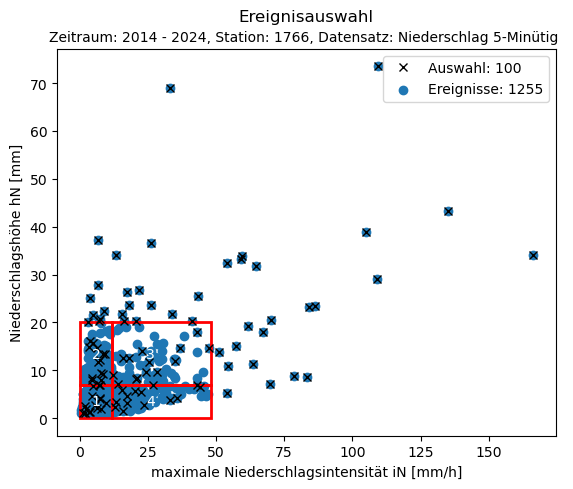

In [34]:
from tabulate import tabulate
P_20_4 = P_events_sort[(P_events_sort['hN_mm'] > 20) | (P_events_sort['iN_max_60'] > 4*12)]

n_events = [14,14,14,15]
h = [0, 7, 20]
iN = [0, 12, 48]
rs = 6

i = 0
j = 0
P_sample = pd.DataFrame()

for k in range(len(n_events)):

    selected_events = P_events_sort[(P_events_sort['iN_max_60'] >= iN[i]) & (P_events_sort['iN_max_60'] < iN[i+1]) & (P_events_sort['hN_mm'] >= h[j]) & (P_events_sort['hN_mm'] < h[j+1])]
    P_sample = pd.concat([P_sample, selected_events.sample(n_events[k-1], random_state=rs)])

    if k == 0:
        j += 1
    if k == 1:
        i += 1
    if k == 2:
        j -= 1

P_sample = pd.concat([P_sample, P_20_4])

# Plot hN_max_60 vs hN_mm with different symbols
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot(P_sample['iN_max_60'], P_sample['hN_mm'], 'x', color='black', label='Sample')
ax.scatter(P_events_sort['iN_max_60'], P_events_sort['hN_mm'], marker='o',  label='Events')

ax.set_xlabel('maximale Niederschlagsintensität iN [mm/h]')
ax.set_ylabel('Niederschlagshöhe hN [mm]')
ax.set_title('Ereignisauswahl', pad=20)
ax.text(0.5, 1.03, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(labels=['Auswahl: {}'.format(len(P_sample)), 'Ereignisse: {}'.format(len(P_events_sort))])
ax.add_patch(Rectangle((iN[0], iN[0]), iN[1], h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(6, 3.5, '1', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[0], h[1]), iN[1], h[2]-h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(6, 13.5, '2', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[1], h[1]), iN[2]-iN[1], h[2]-h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(26, 13.5, '3', ha='center', va='center', color='white')
ax.add_patch(Rectangle((iN[1], h[0]), iN[2]-iN[1], h[1], edgecolor='red', facecolor='none', lw=2))
ax.text(26, 3.55, '4', ha='center', va='center', color='white')
plt.tight_layout()
print("Anzahl ausgewählter Ereignisse:", len(P_sample))

print("Davon auserhalb des Rasters:", len(P_20_4))

print("Davon je Rasterzelle")
table_data = [[14, 14], [14, 15]]

print(tabulate(table_data, tablefmt='grid'))

plt.show()


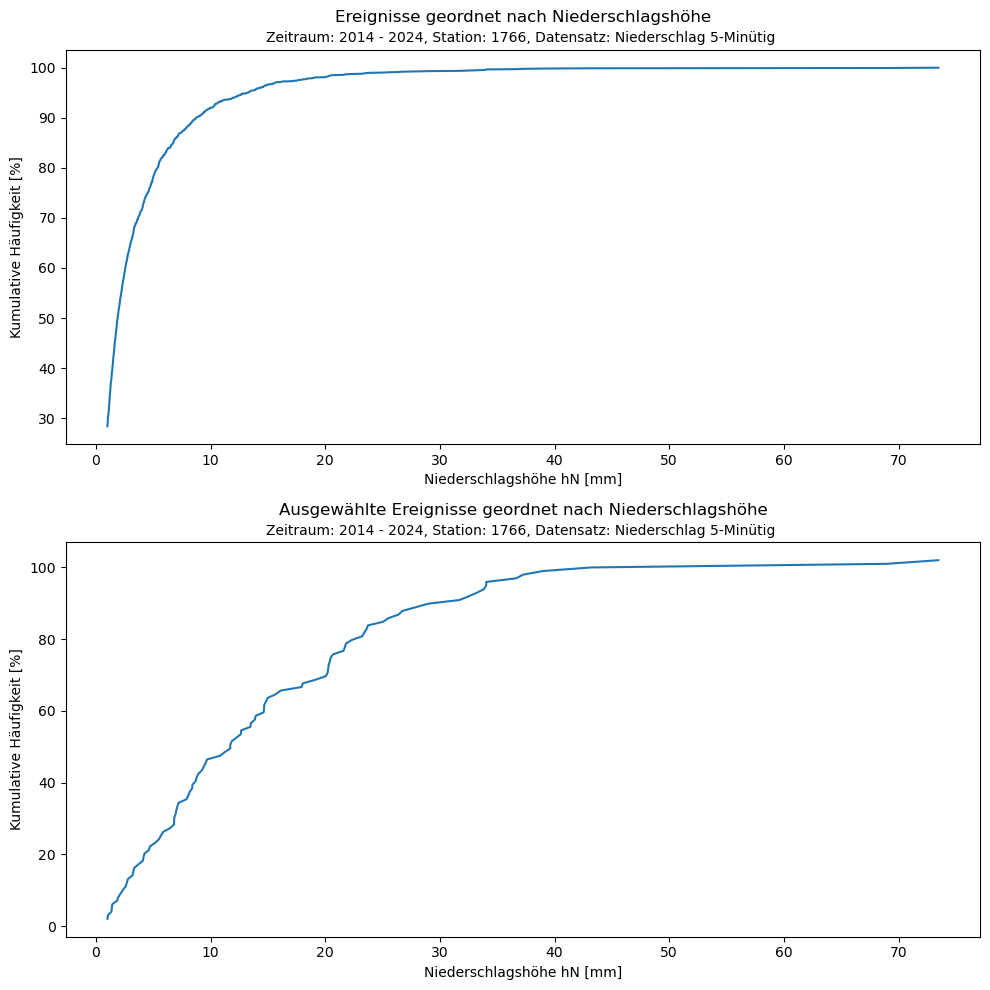

In [35]:
P_sample = P_sample.sort_values('hN_mm').reset_index(drop=True)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

ylabel = 'Kumulative Häufigkeit [%]'
xlabel = 'Niederschlagshöhe hN [mm]'

plt.subplots_adjust(hspace=0.3)
axes[0].plot(P_events_sort['hN_mm'], P_events_sort.index / max(P_events_sort.index)*100)
axes[0].set_ylabel(ylabel)  # Add this line to label the x-axis
axes[0].set_xlabel(xlabel)
axes[0].set_title('Ereignisse geordnet nach Niederschlagshöhe', pad = 20)
axes[0].text(0.5, 1.03, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)


axes[1].plot(P_sample['hN_mm'], (P_sample.index + 2) / max(P_sample.index)*100)
axes[1].set_ylabel(ylabel)  # Add this line to label the x-axis
axes[1].set_xlabel(xlabel)
axes[1].set_title('Ausgewählte Ereignisse geordnet nach Niederschlagshöhe', pad = 20)
axes[1].text(0.5, -0.22, 'Zeitraum: 2014 - 2024, Station: 1766, Datensatz: Niederschlag 5-Minütig ', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
plt.tight_layout()
plt.show()
# P_sample[P_sample['hN_mm'] < 2]

## Extrahieren der Eventdaten

In [45]:
from modules.extract_events import extract_events
extract_events(P_sample, P_series, save_folder)


Event 2017-12-11 22:10:00 saved to 02_input_data/events_FMO\2017-12-11 22 10 00_hN1.0.csv
Event 2023-11-01 04:40:00 saved to 02_input_data/events_FMO\2023-11-01 04 40 00_hN1.05.csv
Event 2020-09-05 04:30:00 saved to 02_input_data/events_FMO\2020-09-05 04 30 00_hN1.35.csv
Event 2023-09-18 18:00:00 saved to 02_input_data/events_FMO\2023-09-18 18 00 00_hN1.38.csv
Event 2020-05-23 11:30:00 saved to 02_input_data/events_FMO\2020-05-23 11 30 00_hN1.42.csv
Event 2023-07-05 01:35:00 saved to 02_input_data/events_FMO\2023-07-05 01 35 00_hN1.84.csv
Event 2016-02-02 11:05:00 saved to 02_input_data/events_FMO\2016-02-02 11 05 00_hN1.95.csv
Event 2014-06-10 04:50:00 saved to 02_input_data/events_FMO\2014-06-10 04 50 00_hN2.15.csv
Event 2015-05-19 13:20:00 saved to 02_input_data/events_FMO\2015-05-19 13 20 00_hN2.36.csv
Event 2020-12-07 02:50:00 saved to 02_input_data/events_FMO\2020-12-07 02 50 00_hN2.6.csv
Event 2016-03-28 13:05:00 saved to 02_input_data/events_FMO\2016-03-28 13 05 00_hN2.69.csv
E

In [30]:
print("Maximale Ereignisdauer: ", round(P_sample["DN_h"].max(),2), " h")

Maximale Ereignisdauer:  39.92  h


In [27]:
from modules.save_load_model import load_model_container
from modules.sequence_and_normalize import sequence_list

model_name = 'Gievenbeck_LSTM_Single_MSE2024-05-16'
base_folder = os.path.join('05_models', 'loss_functions_compare')

model_folder = os.path.join(base_folder, model_name)
model_container = load_model_container(model_folder, print_info=False)
model_id = 'model_' + str(model_container['select_id'])
# model = model_container[model_id]
m = model_container['selected_model']
m['cv_scores'] = model_container['cv_scores']
comb_history = {}
for key in model_container['selected_model']['history'].keys():
    sel_history = model_container['selected_model']['history'][key]
    prev_history = model_container[model_id]['history'][key]
    comb_history[key] = prev_history + sel_history
m['combined_history'] = comb_history


model = m['model']
lag = m['lag']
delay = m['delay']
p_steps = m['prediction_steps']
in_vars_future = m['in_vars']
try:
    in_vars_past = m['in_vars_past']
except:
    in_vars_past = None
    pass
out_vars = m['out_vars']
test_data = m['test_data']
train_data = m['train_data']
# val_data = m['validation_data']
in_scaler = m['in_scaler']
out_scaler = m['out_scaler']

seq_train, seq_train_trans = sequence_list(train_data, in_vars_future=in_vars_future, out_vars=out_vars, in_scaler=in_scaler, 
                                out_scaler=out_scaler, lag=lag, delay=delay, prediction_steps=p_steps, in_vars_past=in_vars_past)

# seq_val, seq_val_trans = sequence_list(val_data, in_vars=in_vars, out_vars=out_vars, in_scaler=in_scaler, 
                                # out_scaler=out_scaler, lag=lag, delay=delay, prediction_steps=p_steps)

seq_test, seq_test_trans = sequence_list(test_data, in_vars_future=in_vars_future, out_vars=out_vars, in_scaler=in_scaler, 
                                out_scaler=out_scaler, lag=lag, delay=delay, prediction_steps=p_steps, in_vars_past=in_vars_past)

c:\Users\fl-al\.conda\envs\ml\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 12 variables whereas the saved optimizer has 2 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [28]:
seq_trans = seq_train_trans + seq_test_trans
# seq_trans = seq_trans.append(seq_test_trans)
len(seq_trans)

226

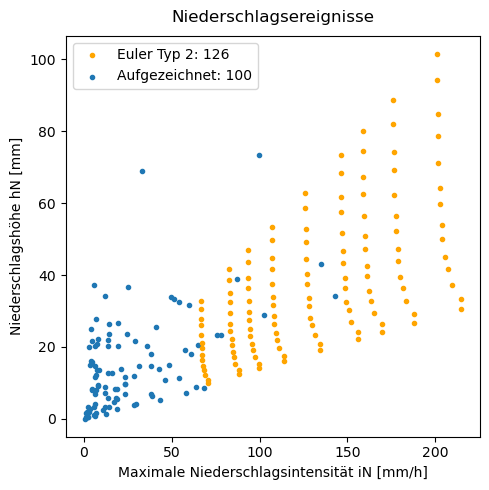

In [39]:
# Darstellung aller Ereignisse

e2_precipitation = [obj[0]['total precipitation'] for obj in seq_trans if obj[0]['event type'] == 'Euler Typ 2']
e2_intensity = [obj[0]['max intensity'] for obj in seq_trans if obj[0]['event type'] == 'Euler Typ 2']

aufgezeichnet_precipitation = [obj[0]['total precipitation'] for obj in seq_trans if obj[0]['event type'] == 'Aufgezeichnet']
aufgezeichnet_intensity = [obj[0]['max intensity'] for obj in seq_trans if obj[0]['event type'] == 'Aufgezeichnet']

# Plot events precipitation and intensity in scatterplot
fig, ax2 = plt.subplots(figsize=(5, 5))
ax2.plot( e2_intensity, e2_precipitation,'.', color='orange', label='Sample')
ax2.scatter(aufgezeichnet_intensity, aufgezeichnet_precipitation, marker='.',  label='Events')
ax2.set_xlabel('Maximale Niederschlagsintensität iN [mm/h]')
ax2.set_ylabel('Niederschlagshöhe hN [mm]')
ax2.set_title('Niederschlagsereignisse', pad=10)
ax2.legend(labels=['Euler Typ 2: {}'.format(len(e2_precipitation)), 'Aufgezeichnet: {}'.format(len(aufgezeichnet_precipitation))])
plt.tight_layout()

In [ ]:

cv = KFold(n_splits=cv_splits, shuffle=True, random_state=50)


for train, val in cv.split(train_val_data):
    train_data = [train_val_data[i] for i in train]
    val_data = [train_val_data[i] for i in val]